# Linear Regression

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("regression.txt",header=None, usecols=[0,1], names=['label','features'])


In [158]:
data.head()

,label,features
0,-1.74,1.66
1,1.24,-1.18
2,0.29,-0.40
3,-0.13,0.09
4,-0.39,0.38


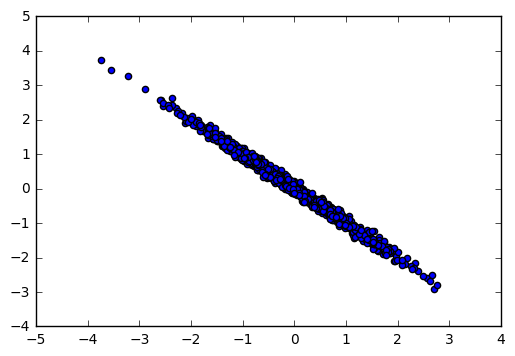

In [159]:
plt.scatter(data['label'], data['features'])

In [160]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data['label'], data['features'])

In [161]:
r_value ** 2

0.98995281007882807

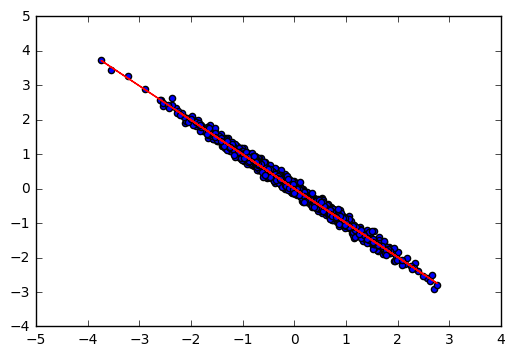

In [162]:
def predict(x):
    return slope * x + intercept

fitLine = predict(data['label'])

plt.scatter(data['label'], data['features'])
plt.plot(data['label'], fitLine, c='r')
plt.show()

In [163]:
predict(0.13)

-0.12936388078804487

In [164]:
predict(1.15)

-1.1442178477531026

# sklearn model

In [165]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [166]:
# Shuffle the data's rows (This is only necessary because of the way I created
# the data using DrawMyData. This would not normally be necessary with a real analysis).
data = data.sample(frac=1)

## Explore Data

In [167]:
data.head()

,label,features
987,0.81,-0.81
672,0.08,-0.08
776,-1.24,1.17
306,-0.11,0.11
33,0.40,-0.36


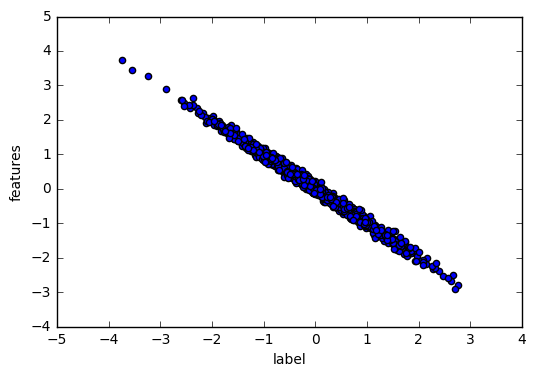

In [168]:
# Plot the two variables against eachother
data.plot(x='label', y='features', kind='scatter')

## Break Data Up Into Training And Test Datasets
Now for the real work. To judge how how good our model is, we need something to test it against. We can accomplish this using a technique called cross-validation. Cross-validation can get much more complicated and powerful, but in this example we are going do the most simple version of this technique.

### Steps

1. Divide the dataset into two datasets: A 'training' dataset that we will use to train our model and a 'test' dataset that we will use to judge the accuracy of that model.
2. Train the model on the 'training' data.
3. Apply that model to the test data's X variable, creating the model's guesses for the test data's Ys.
4. Compare how close the model's predictions for the test data's Ys were to the actual test data Ys.

In [169]:
# Create our predictor/independent variable
# and our response/dependent variable
X = data['label']
y = data['features']

In [170]:
# Create our test data from the first 30 observations
X_test = X[0:30].reshape(-1,1)
y_test = y[0:30]

# Create our training data from the remaining observations
X_train = X[30:].reshape(-1,1)
y_train = y[30:]

### Train The Linear Model
Let us train the model using our training data.

In [171]:
# Create an object that is an ols regression
lim = linear_model.LinearRegression()

In [172]:
# Train the model using our training data
model = lim.fit(X_train, y_train)

### View The Results
Here are some basic outputs of the model, notably the coefficient and the R-squared score.

In [173]:
# View the training model's coefficient
model.coef_

array([-0.99527514])

In [174]:
# View the R-Squared score
model.score(X_test, y_test)

0.99313348239192223

In [175]:
# Run the model on X_test and show the first five results
list(model.predict(X_test)[0:5])

[-0.80622587360289,
 -0.079675019136113301,
 1.2340881697627157,
 0.10942725805386967,
 -0.39816306492976888]

In [176]:
# View the first five test Y values
list(y_test)[0:5]

[-0.81000000000000005,
 -0.080000000000000002,
 1.1699999999999999,
 0.11,
 -0.35999999999999999]

In [177]:
# Apply the model we created using the training data
# to the test data, and calculate the RSS (residual sum of squares)
((y_test - model.predict(X_test)) **2).sum()

0.20918012755538978

In [178]:
# Calculate the MSE (Mean Squared Error)
np.mean((model.predict(X_test) - y_test) **2)

0.0069726709185129925